   OBJECTID           Name        Acres Neighborho  SqMiles    ShapeSTAre  \
0        27     Roslindale  1605.568237         15     2.51  6.993827e+07   
1        28  Jamaica Plain  2519.245394         11     3.94  1.097379e+08   
2        29   Mission Hill   350.853564         13     0.55  1.528312e+07   
3        30       Longwood   188.611947         28     0.29  8.215904e+06   
4        31    Bay Village    26.539839         33     0.04  1.156071e+06   

     ShapeSTLen                                           geometry  
0  53563.912597  MULTIPOLYGON (((757409.123 2924367.749, 757457...  
1  56349.937161  POLYGON ((762983.826 2944104.016, 763014.250 2...  
2  17918.724113  POLYGON ((766903.580 2947645.876, 766280.013 2...  
3  11908.757148  POLYGON ((764826.911 2947985.998, 764607.180 2...  
4   4650.635493  POLYGON ((773315.750 2952419.751, 773111.500 2...  


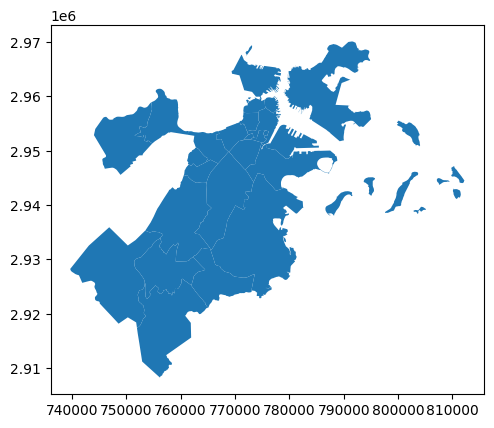

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# load the shapefile
shapefile_path1 = "../data/Boston_Neighborhoods/Boston_Neighborhoods.shp"
tracts1 = gpd.read_file(shapefile_path1)

# print(tracts.crs)  # 查看数据对应的投影信息
print(tracts1.head())  # 查看前5行数据
tracts1.plot()
plt.show()#简单展示


   OBJECTID STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20  \
0         1        25        025    140202  25025140202  1402.02   
1         2        25        025    140300  25025140300     1403   
2         3        25        025    140400  25025140400     1404   
3         4        25        025    140106  25025140106  1401.06   
4         5        25        025    110201  25025110201  1102.01   

     NAMELSAD20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0  Census Tract   G5020          S  1538599     17120  +42.2495181   
1  Census Tract   G5020          S  1548879     38736  +42.2587734   
2  Census Tract   G5020          S  1874512     11680  +42.2692219   
3  Census Tract   G5020          S   278837      3116  +42.2738738   
4  Census Tract   G5020          S   348208         0  +42.2804960   

     INTPTLON20    Shape_STAr    Shape_STLe  \
0  -071.1175430  1.674441e+07  18525.133039   
1  -071.1188131  1.708768e+07  24186.699503   
2  -071.1118088  2.030132e+07

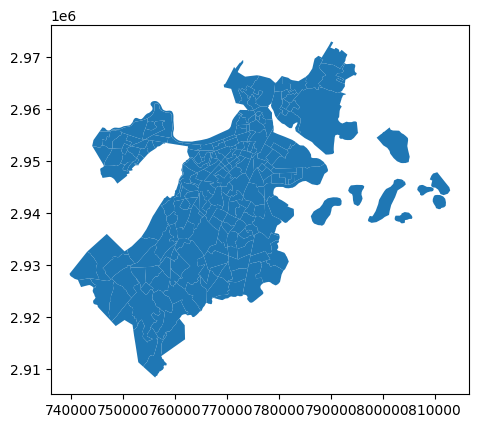

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# load the shapefile
shapefile_path2 = "../data/census_tract_data/Census2020_Tracts.shp"
tracts2 = gpd.read_file(shapefile_path2)

# print(tracts.crs)  # 查看数据对应的投影信息
print(tracts2.head())  # 查看前5行数据
tracts2.plot()
plt.show()#简单展示

In [25]:
# perform spatial join using "intersects" relationship
joined = gpd.sjoin(tracts2, tracts1, op='intersects')

# randomly assign each tract in tracts2 to a neighborhood in tracts1
import random
neighborhoods = joined.groupby('index_right').groups.keys()
for neighborhood in neighborhoods:
    tracts = joined[joined['index_right'] == neighborhood]
    tracts2.loc[tracts.index, 'Neighbor'] = random.choice([tracts1.loc[neighborhood, 'Name']] * len(tracts))

tracts2

/Users/mirackchan/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/h4/qv9ymlxn5v54y1vnffsnvmlr0000gn/T/ipykernel_60307/318968767.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...
Right CRS: EPSG:2249

  joined = gpd.sjoin(tracts2, tracts1, op='intersects')


,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry,Boston_Neighborhood,Neighbor
0,1,25,025,140202,25025140202,1402.02,Census Tract,G5020,S,1538599,17120,+42.2495181,-071.1175430,1.674441e+07,18525.133039,"POLYGON ((757373.036 2913676.433, 757377.218 2...",NaN,Hyde Park
1,2,25,025,140300,25025140300,1403,Census Tract,G5020,S,1548879,38736,+42.2587734,-071.1188131,1.708768e+07,24186.699503,"POLYGON ((756308.459 2916770.814, 756446.058 2...",NaN,Hyde Park
2,3,25,025,140400,25025140400,1404,Census Tract,G5020,S,1874512,11680,+42.2692219,-071.1118088,2.030132e+07,27404.983907,"POLYGON ((757682.058 2924622.055, 757807.152 2...",NaN,Mattapan
3,4,25,025,140106,25025140106,1401.06,Census Tract,G5020,S,278837,3116,+42.2738738,-071.1371416,3.034720e+06,7521.419039,"POLYGON ((753408.502 2925331.042, 753418.584 2...",NaN,Hyde Park
4,5,25,025,110201,25025110201,1102.01,Census Tract,G5020,S,348208,0,+42.2804960,-071.1170508,3.747840e+06,10276.929778,"POLYGON ((759003.960 2926858.165, 759043.379 2...",Roslindale,Roslindale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,25,025,061202,25025061202,612.02,Census Tract,G5020,S,380810,4897,+42.3387527,-071.0625085,4.151441e+06,9863.203623,"POLYGON ((773636.394 2947776.746, 773641.530 2...",NaN,South Boston
203,204,25,025,070801,25025070801,708.01,Census Tract,G5020,S,61235,0,+42.3399771,-071.0825322,6.590784e+05,3324.809260,"POLYGON ((768450.923 2949304.833, 768550.937 2...",NaN,Back Bay
204,205,25,025,060601,25025060601,606.01,Census Tract,G5020,S,140332,0,+42.3392514,-071.0489604,1.510420e+06,5135.560328,"POLYGON ((777185.384 2949170.447, 777313.336 2...",South Boston,South Boston
205,206,25,025,070901,25025070901,709.01,Census Tract,G5020,S,57691,0,+42.3377169,-071.0795662,6.209278e+05,3841.042994,"POLYGON ((769230.210 2948676.359, 769406.112 2...",NaN,South End


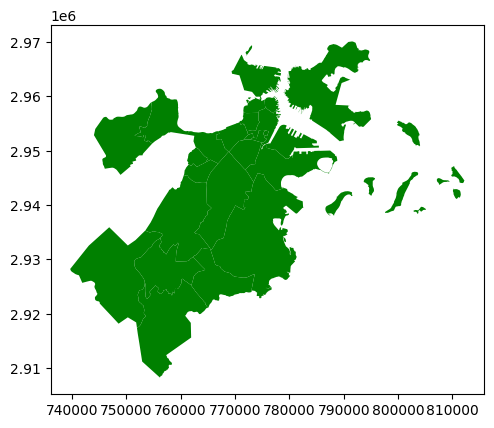

In [19]:
# plot both tracts1 and tracts2 on same axis
fig, ax = plt.subplots()
tracts1.plot(ax=ax, color='green')
# tracts2.plot(ax=ax, color='blue')

plt.show()
